<a href="https://colab.research.google.com/github/andrewgalvin/principles-of-ml-final-project/blob/main/IrisBoundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

iris=datasets.load_iris()

In [5]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 4.3 MB/s 
     |████████████████████████████████| 295 kB 48.7 MB/s 
     |████████████████████████████████| 965 kB 37.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


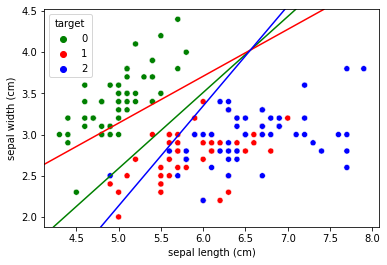

In [2]:
# the following reference aided in creating and plotting the decision boundary: https://medium.com/@jairiidriss/iris-flower-classification-and-decision-boundary-plotting-using-logistic-regression-3c5af7948cb7
from sklearn.linear_model import LogisticRegression
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['target'] = iris['target']

x = df.iloc[:, [0,1]]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

logreg = LogisticRegression(C=10.0)
logreg.fit(x_train, y_train)

weights0 = [logreg.intercept_[0],logreg.coef_[0,0],logreg.coef_[0,1]]
weights1 = [logreg.intercept_[1],logreg.coef_[1,0],logreg.coef_[1,1]]
weights2 = [logreg.intercept_[2],logreg.coef_[2,0],logreg.coef_[2,1]]

g =sn.scatterplot(x="sepal length (cm)",y="sepal width (cm)",
              hue="target",
              data=df,palette=['green','red','blue']);

x1 = (-weights0[0] - weights0[2] * df.iloc[0,1])/weights0[1]
x2 = (-weights0[0] - weights0[2] * df.iloc[4,1])/weights0[1]

plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "green")

x1 = (-weights1[0] - weights1[2] * df.iloc[0,1])/weights1[1]
x2 = (-weights1[0] - weights1[2] * df.iloc[4,1])/weights1[1]

plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "red")

x1 = (-weights2[0] - weights2[2] * df.iloc[0,1])/weights2[1]
x2 = (-weights2[0] - weights2[2] * df.iloc[4,1])/weights2[1]

plt.axline((x1, df.iloc[0,1]), (x2, df.iloc[4,1]), color = "blue")